In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
from jupyterthemes import jtplot
jtplot.style()

## Branching

An Isolated Branching Node - Analytically

Dayan & Abott Section 6.3

Solution:

## $v_1(x) = p_1 I_e R_{\lambda_1} exp(\frac{-x_1}{\lambda_1} - \frac{y}{\lambda_2})$

## $v_2(x) = \frac{I_e R_{\lambda_2}}{2} [exp(\frac{-|y-x_2|}{\lambda_2}) + (2p_2 - 1)exp(\frac{-(y+x_2)}{\lambda_2})]$

## $v_3(x) = p_3 I_e R_{\lambda_3} exp(\frac{-x_3}{\lambda_3} - \frac{y}{\lambda_2})$

where, for $i = 1, 2, 3,$

## $p_i = \frac{a_i^{3/2}}{a_1^{3/2} + a_2^{3/2} + a_3^{3/2}}, \quad \lambda_i = \sqrt{\frac{a_i r_m}{2r_L}}, \quad R_{\lambda_i} = \frac{r_L \lambda_i}{\pi a_i^2}$

Creating functions:

In [4]:
def V1(x,y,p1,lam1,lam2,R1,I_e):
    voltage = p1 * I_e * R1 * np.exp(-x/lam1) * np.exp(-y/lam2)
    return voltage

In [5]:
def V2(x,y,p2,lam2,R2,I_e):
    voltage = ((I_e*R2)/2) * (np.exp(-np.abs(y-x)/lam2) + (2*p2-1) * np.exp(-(y+x)/lam2))
    return voltage

In [6]:
def V3(x,y,p3,lam2,lam3,R3,I_e):
    voltage = p3 * I_e * R3 * np.exp(-x/lam3) * np.exp(-y/lam2)
    return voltage

In [7]:
def p_i(a_i,a1,a2,a3):
    p = (a_i**(3/2)) / ((a1**(3/2)) + (a2**(3/2)) + (a3**(3/2)))
    return p

In [8]:
def lam_i(a_i,r_m,r_L):
    lam = np.sqrt((a_i*r_m)/(2*r_L))
    return lam

In [9]:
def R_lam_i(lam_i,a_i,r_L):
    R = (r_L*lam_i)/(np.pi*(a_i**2))
    return R

Combining the equations:

In [10]:
def voltage(x1,x2,x3,y,a,r_m,r_L,I_e):
    
    if y < 0: #unneeded for our bounds though
        x1,x2 = x2,x1
        
    p1 = p_i(a_i=a[0],a1=a[0],a2=a[1],a3=a[2])
    p2 = p_i(a_i=a[1],a1=a[0],a2=a[1],a3=a[2])
    p3 = p_i(a_i=a[2],a1=a[0],a2=a[1],a3=a[2])
    lam1 = lam_i(a_i=a[0],r_m=r_m,r_L=r_L)
    lam2 = lam_i(a_i=a[1],r_m=r_m,r_L=r_L)
    lam3 = lam_i(a_i=a[2],r_m=r_m,r_L=r_L)
    R_lam1 = R_lam_i(lam_i=lam1,a_i=a[0],r_L=r_L)
    R_lam2 = R_lam_i(lam_i=lam2,a_i=a[1],r_L=r_L)
    R_lam3 = R_lam_i(lam_i=lam3,a_i=a[2],r_L=r_L)

    voltage1 = V1(x=x1,y=y,p1=p1,lam1=lam1,lam2=lam2,R1=R_lam1,I_e=I_e)
    voltage2 = V2(x=x2,y=y,p2=p2,lam2=lam2,R2=R_lam2,I_e=I_e)
    voltage3 = V3(x=x3,y=y,p3=p3,lam2=lam2,lam3=lam3,R3=R_lam3,I_e=I_e)
    
    if y < 0: #to account for change in equations
        voltage1 = V2(x=x1,y=-y,p2=p1,lam2=lam1,R2=R_lam1,I_e=I_e)
        voltage2 = V1(x=x2,y=-y,p1=p2,lam1=lam2,lam2=lam1,R1=R_lam2,I_e=I_e)
        voltage3 = V3(x=x3,y=-y,p3=p3,lam2=lam1,lam3=lam3,R3=R_lam3,I_e=I_e)
        
    v_total = voltage1 + voltage2 + voltage3 
    
    return v_total, voltage1, voltage2, voltage3

Plotting:

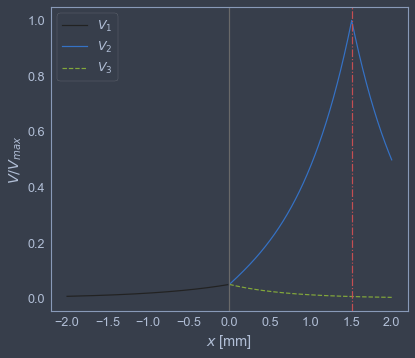

In [11]:
x1 = np.linspace(0,2,1e3) #mm
x2 = np.linspace(0,2,1e3) #mm
x3 = np.linspace(0,2,1e3) #mm

y = -1 #mm
y = 2**(-1/2)+0.8 #mm

a = [2e-3,1e-3,1e-3] #µm
I_e = 1 #whatever
r_m = 1e9 #M.ohm.mm^2
r_L = 1e6 #k.ohm.mm

v_max = voltage(x1=y,x2=y,x3=y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[2]
if y < 0:
    v_max = voltage(x1=-y,x2=-y,x3=-y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[1]
#v_max = 1

plt.plot(-x1,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[1]/v_max,label='$V_1$',c='k')
plt.plot(x2,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[2]/v_max,label='$V_2$')
plt.plot(x3,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[3]/v_max,label='$V_3$',linestyle='--')
plt.axvline(x=0,c='dimgrey',linestyle='-') #branching point
plt.axvline(x=y,c='r',linestyle='-.') #current injection point
plt.ylabel('$V/V_{max}$')
plt.xlabel('$x$ [mm]')
plt.legend()
plt.grid()
plt.show()

In [12]:
volvo = voltage(x1=0,x2=0,x3=0,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)
print(volvo[1]/v_max)
print(volvo[2]/v_max)
print(volvo[3]/v_max)

0.049565501865290254
0.04956550186529026
0.049565501865290254


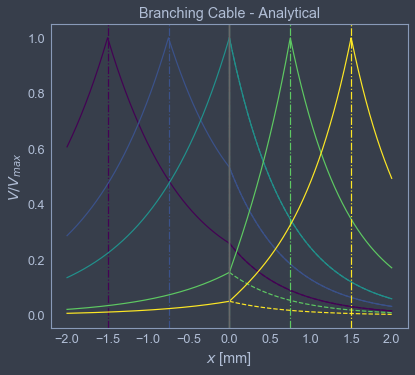

In [14]:
i = [-1.5,-0.75,0,0.75,1.5]
colors = iter(cm.viridis(np.linspace(0, 1, len(i))))
for y in i:
    v_max = voltage(x1=y,x2=y,x3=y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[2]
    if y < 0:
        v_max = voltage(x1=-y,x2=-y,x3=-y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[1]
    #v_max = 1
    c = next(colors)
    plt.plot(-x1,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[1]/v_max,c=c)
    plt.plot(x2,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[2]/v_max,c=c)
    plt.plot(x3,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[3]/v_max,c=c,linestyle='--')
    plt.axvline(x=0,c='dimgrey',linestyle='-') #branching point
    plt.axvline(x=y,c=c,linestyle='-.') #current injection point
plt.title('Branching Cable - Analytical')
plt.ylabel('$V/V_{max}$')
plt.xlabel('$x$ [mm]')
plt.grid()
plt.savefig('branchingtheme')